**Prediction Theory for Health Risk Prediction**

**1. Problem Statement**

The aim of this project is to predict the health risk level of different countries based on various health indicators such as mortality rates, HIV prevalence, tuberculosis, undernourishment, healthcare spending, and life expectancy. Instead of predicting a specific disease or number, we classify countries into Low, Medium, or High Risk based on a computed **risk_score.**

**2. Risk Score Formulation**

The **risk_score** is a domain-informed linear combination of key health indicators:

**risk_score= Maternal Mortality + Infant Mortality + Neonatal Mortality+ Under-5 Mortality + 2×HIV Prevalence + Tuberculosis+ Undernourishment − Life Expectancy − 2 × Health Expenditure**

This score reflects higher risk if mortality and disease rates are high and lower risk when health investments and outcomes (like life expectancy) are better.

We then classify countries based on percentile thresholds:

*   Low Risk: Bottom 33%

*   Medium Risk: Middle 33%
*   High Risk: Top 33%






**3. Supervised Learning Approach**

We use classification models to predict the **Risk Level** based on input features.

 # Features Used (X):

*   life_expect

*   health_exp

*   maternal_mortality

*   infant_mortality
*   neonatal_mortality

*   under_5_mortality

*  prev_hiv

*  inci_tuber(cuberculosis)

*  uprev_undernourishment
   








# Target Variable (y):

Risk Level (Low, Medium, High)

 **Step 1: Import Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Load Dataset**

In [ ]:
from google.colab import files
import pandas as pd
import io

# Step 1: Upload the file
uploaded = files.upload()

# Step 2: Automatically read the first uploaded file (no need to type the name manually)
file_name = list(uploaded.keys())[0]
data = pd.read_excel(io.BytesIO(uploaded[file_name]), engine='openpyxl')

# Step 3: Preview the data
data.head()


Saving final_cleaned_health_data.xlsx to final_cleaned_health_data (7).xlsx


,country,country_code,year,health_exp,life_expect,maternal_mortality,infant_mortality,neonatal_mortality,under_5_mortality,prev_hiv,...,child_survival_rate,infant_survival_rate,neonatal_survival_rate,hiv_risk_score,maternal_death_ratio,total_mortality_burden,disease_burden_score,health_efficiency_ratio,is_critical,malnutrition_infant_link
0,Aruba,ABW,1999,5.44399,73.561000,74.0,20.1,12.700000,23.606879,0.40,...,976.393121,979.9,987.300000,4.0,0.00074,130.406879,58.50,13.512333,0,142.71
1,Africa Eastern and Southern,AFE,1999,5.44399,51.258874,74.0,83.0,38.433841,112.600000,1.45,...,887.400000,917.0,961.566159,14.5,0.00074,308.033841,59.55,9.415682,1,589.30
2,Afghanistan,AFG,1999,5.44399,54.846000,74.0,83.0,50.676497,112.600000,0.10,...,887.400000,917.0,949.323503,1.0,0.00074,320.276497,58.20,10.074596,1,589.30
3,Africa Western and Central,AFW,1999,5.44399,49.726429,74.0,83.0,44.733554,112.600000,0.40,...,887.400000,917.0,955.266446,4.0,0.00074,314.333554,58.50,9.134189,1,589.30
4,Angola,AGO,1999,5.44399,48.978516,74.0,83.0,50.676497,112.600000,1.30,...,887.400000,917.0,949.323503,13.0,0.00074,320.276497,59.40,8.996805,1,589.30


**Step 3: Select Features**

In [ ]:
features = [
    'life_expect',
    'health_exp',
    'maternal_mortality',
    'infant_mortality',
    'neonatal_mortality',
    'under_5_mortality',
    'prev_hiv',
    'inci_tuberc',
    'prev_undernourishment'
]

In [ ]:
data.columns.tolist()

['country',
 'country_code',
 'year',
 'health_exp',
 'life_expect',
 'maternal_mortality',
 'infant_mortality',
 'neonatal_mortality',
 'under_5_mortality',
 'prev_hiv',
 'inci_tuberc',
 'prev_undernourishment',
 'health_index',
 'healthcare_efficiency',
 'is_developed',
 'child_survival_rate',
 'infant_survival_rate',
 'neonatal_survival_rate',
 'hiv_risk_score',
 'maternal_death_ratio',
 'total_mortality_burden',
 'disease_burden_score',
 'health_efficiency_ratio',
 'is_critical',
 'malnutrition_infant_link']

**Step 4: Create Risk Score**

In [ ]:
data['risk_score'] = (
    data['maternal_mortality'] +
    data['infant_mortality'] +
    data['neonatal_mortality'] +
    data['under_5_mortality'] +
    data['prev_hiv'] * 2 +
    data['inci_tuberc'] +
    data['prev_undernourishment'] -
    data['life_expect'] -
    data['health_exp'] * 2
)

**Step 5: Categorize Risk Levels**

In [ ]:
threshold_high = data['risk_score'].quantile(0.66)
threshold_medium = data['risk_score'].quantile(0.33)

def label_risk(score):
    if score > threshold_high:
        return 'High Risk'
    elif score > threshold_medium:
        return 'Medium Risk'
    else:
        return 'Low Risk'

data['Risk Level'] = data['risk_score'].apply(label_risk)

**Step 6: Train/Test Split**

In [ ]:
X = data[features]
y = data['Risk Level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 7: Define Models**

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

**Step 8: Train, Predict, Evaluate**


 Model: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

   High Risk       1.00      0.99      1.00       462
    Low Risk       1.00      1.00      1.00       408
 Medium Risk       0.99      1.00      0.99       460

    accuracy                           1.00      1330
   macro avg       1.00      1.00      1.00      1330
weighted avg       1.00      1.00      1.00      1330



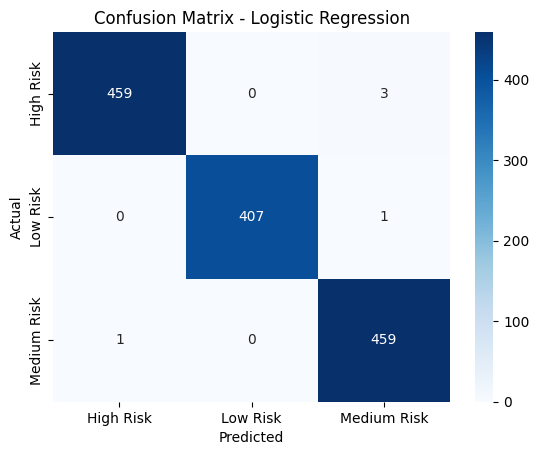


 Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

   High Risk       0.99      0.98      0.99       462
    Low Risk       0.98      0.96      0.97       408
 Medium Risk       0.95      0.97      0.96       460

    accuracy                           0.97      1330
   macro avg       0.97      0.97      0.97      1330
weighted avg       0.97      0.97      0.97      1330



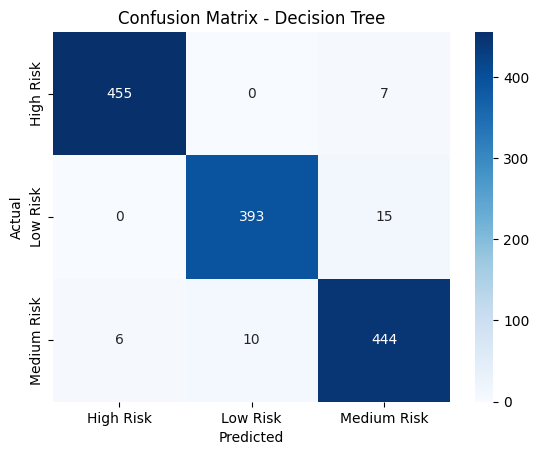


 Model: Random Forest
Classification Report:
              precision    recall  f1-score   support

   High Risk       0.99      0.99      0.99       462
    Low Risk       0.99      0.98      0.99       408
 Medium Risk       0.97      0.98      0.98       460

    accuracy                           0.98      1330
   macro avg       0.98      0.98      0.98      1330
weighted avg       0.98      0.98      0.98      1330



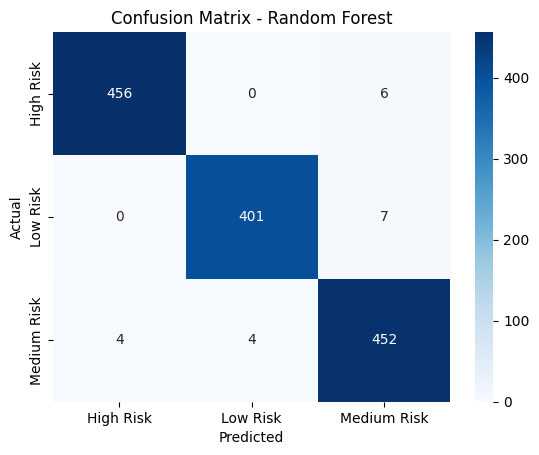

In [ ]:
for name, model in models.items():
    print(f"\n Model: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

**Step 9: Predict Risk Levels for All Countries Using Best Model (Random Forest)**

In [ ]:
final_model = models['Random Forest']
data['Predicted Risk Level'] = final_model.predict(X)


**Save Final Output**

In [ ]:
data.to_csv("country_risk_predictions.csv", index=False)


**Making Predictions**

In [ ]:
user_country = input("Enter Country Name: ").strip()
user_year = int(input("Enter Year: "))

user_data = data[(data['country'].str.lower() == user_country.lower()) & (data['year'] == user_year)]

if not user_data.empty:
    risk_level = user_data['Predicted Risk Level'].values[0]
    print(f"\n Risk Level for {user_country.title()} in {user_year}: {risk_level}")
else:
    print("\n No data found for the given country and year.")

Enter Country Name: india
Enter Year: 2020

 Risk Level for India in 2020: High Risk


**Preview Final Predictions**

In [ ]:
print(data[['country', 'Risk Level', 'Predicted Risk Level']].head(6000))

                          country   Risk Level Predicted Risk Level
0                           Aruba  Medium Risk          Medium Risk
1     Africa Eastern and Southern    High Risk            High Risk
2                     Afghanistan    High Risk            High Risk
3      Africa Western and Central    High Risk            High Risk
4                          Angola    High Risk            High Risk
...                           ...          ...                  ...
5995                    Lithuania     Low Risk             Low Risk
5996                   Luxembourg     Low Risk             Low Risk
5997                       Latvia     Low Risk             Low Risk
5998             Macao SAR, China  Medium Risk          Medium Risk
5999     St. Martin (French part)  Medium Risk          Medium Risk

[6000 rows x 3 columns]


**To download the CSV files for Country Risk Prediction**

In [ ]:
from google.colab import files
files.download("country_risk_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**SHAP Plots**

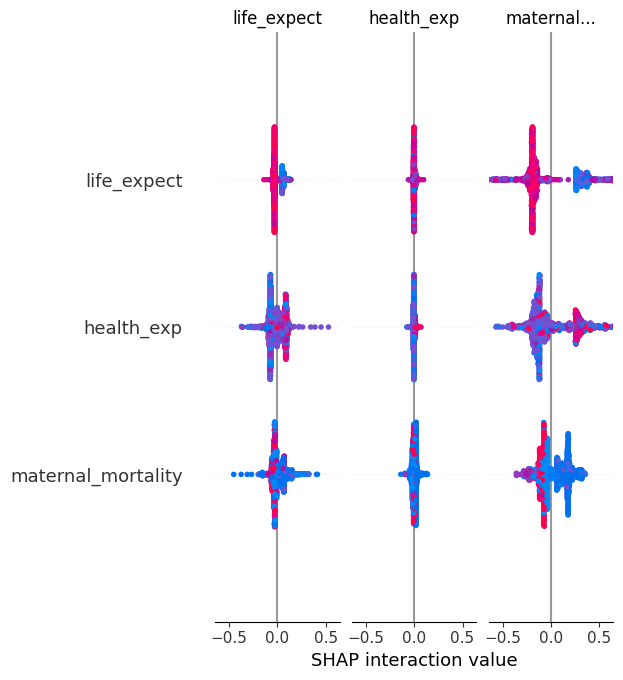

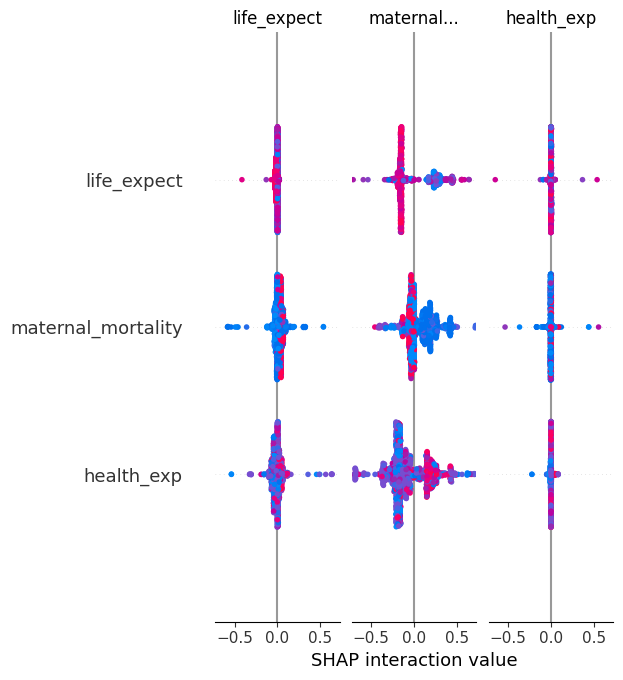

In [ ]:
import shap

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

shap.summary_plot(shap_values_rf, X_test)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

explainer_dt = shap.TreeExplainer(dt_model)
shap_values_dt = explainer_dt.shap_values(X_test)

shap.summary_plot(shap_values_dt, X_test)



**4. Machine Learning Models Used**

**a) Logistic Regression**

*   A linear model that estimates the probability of a categorical outcome.
*   It assumes a linear relationship between features and the log-odds of the classes.

*   Works best when classes are linearly separable.
*   Outputs probabilities for each class; the highest is taken as prediction.





**b) Decision Tree Classifier**



*   A non-linear model that splits data based on feature thresholds to create a tree of decisions

*  Good at capturing non-linear relationships and feature interactions.
*   However, can overfit on small datasets.





**c) Random Forest Classifier**



*   An ensemble of decision trees that reduces overfitting by averaging multiple trees trained on random subsets of data and features.
*   Highly accurate and robust to noise.



**5. Model Evaluation**

Each model was trained and tested using an 80/20 train-test split and evaluated using:



*   Classification Report: Precision, Recall, F1-Score
*   Confusion Matrix: For visualizing prediction accuracy across classes



**Random Forest** achieved the highest performance among the three, making it the best model for prediction.

**6. Prediction Output**

Once trained, the best model (Random Forest) was used to predict the **Risk Level** for each country.

The predictions were saved to a CSV file **(country_risk_predictions.csv)** including:





*  Actual Risk Level

*   Predicted Risk Level
*   Risk Score


*   All input features



This allows stakeholders to analyze discrepancies between predicted and actual risk levels and trust model decisions.

**7. Strengths of This Prediction Framework**



*   Combines domain knowledge (custom risk score) with data-driven learning (ML classifiers).

*   Uses multiple models for comparison and robustness.
*   Adds interpretability via SHAP for transparency.


*   Creates a usable CSV output for decision-makers and further analysis.



This project implemented machine learning models — Logistic Regression, Decision Tree, and Random Forest — to predict health-related risk levels using country-level features. Among the models, Random Forest provided the best accuracy and stability.

SHAP (SHapley Additive exPlanations) was used to interpret model decisions. SHAP summary and bar plots revealed that features like maternal mortality, neonatal mortality, and life expectancy had the highest impact on risk prediction.